<a href="https://colab.research.google.com/github/nanditasangeeth16/MathsEndSemProject-Sem1-/blob/main/MentalHealth_EndSemesterProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library and Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing libaries

In [ ]:
import numpy as np
import pandas as pd
#plots and graphs
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator
#preparation
from sklearn.model_selection import train_test_split
#validation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
#algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

%matplotlib inline

Loading dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Mental Health Survey (Responses).csv")

Dataset informations

In [ ]:
df.head()

,Timestamp,Gender,Age,Occupation,Sleep,Appetite,PhysicalActivities,StressOrAnxiety,Medications,Fatigue,InterestInThings,SocialMedia,Addiction,WorriesOnMH,SurroundingsMH,TimeWithOthers,NewSkill,OpenedUpMH,TreatmentMH,LockdownMH,Feedback
0,12-30-2021 22:35:19,Female,18-24,Student,5-6 hours,Several days,Not so regularly,Moderate,No,Rarely,Often,Excessive,None,Several days,Yes,Often,No,Yes,No,NaN,NaN
1,12-30-2021 22:36:29,Female,18-24,Student,8-10 hours,Not at all,Not at all,Mild,No,Always,Sometimes,Normal,None,More than half the days,No,Rarely,Yes,No,No,I dont know,It's ok ...
2,12-30-2021 22:37:46,Male,18-24,Student,5-6 hours,Several days,Not so regularly,Severe,No,Often,Often,Normal,None,Several days,Yes,Often,Yes,No,No,No effects,👍
3,12-30-2021 22:40:30,Female,18-24,Student,More than 10 hours,More than half the days,Not so regularly,Severe,No,Often,Sometimes,Excessive,None,More than half the days,Yes,Often,Yes,Yes,Yes,It has made me feel more tired and I am hardly...,NaN
4,12-30-2021 22:40:31,Female,18-24,Student,5-6 hours,More than half the days,Not so regularly,Severe,No,Often,Rarely,Excessive,None,More than half the days,Yes,Often,No,No,No,Of course,Finally google forms is ready 🌝


In [ ]:
print("Shape ", df.shape)
print("______________________________________")
print("Describe ", df.describe())
print("______________________________________")
print("Info ", df.info())

Shape  (534, 21)
______________________________________
Describe                    Timestamp Gender     Age  ... TreatmentMH LockdownMH Feedback
count                   534     534    534  ...         534        368      142
unique                  529       2      6  ...           2        284      101
top     12-31-2021 10:15:57  Female  18-24  ...          No         No     Good
freq                      2     294    363  ...         510         33       33

[4 rows x 21 columns]
______________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Timestamp           534 non-null    object
 1   Gender              534 non-null    object
 2   Age                 534 non-null    object
 3   Occupation          534 non-null    object
 4   Sleep               534 non-null    object
 5   Appetite            534 no

# Data Cleaning and Encoding

Missing datas

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

                    Total   Percent
Feedback              392  0.734082
LockdownMH            166  0.310861
Fatigue                 0  0.000000
Gender                  0  0.000000
Age                     0  0.000000
Occupation              0  0.000000
Sleep                   0  0.000000
Appetite                0  0.000000
PhysicalActivities      0  0.000000
StressOrAnxiety         0  0.000000
Medications             0  0.000000
InterestInThings        0  0.000000
SocialMedia             0  0.000000
Addiction               0  0.000000
WorriesOnMH             0  0.000000
SurroundingsMH          0  0.000000
TimeWithOthers          0  0.000000
NewSkill                0  0.000000
OpenedUpMH              0  0.000000
TreatmentMH             0  0.000000
Timestamp               0  0.000000


Removing undesired columns

In [ ]:
df = df.drop(['Timestamp'], axis= 1)
df = df.drop(['LockdownMH'], axis= 1)
df = df.drop(['Feedback'], axis= 1)
df.isnull().sum().max()         #just checking that there's no missing data missing...

0

In [ ]:
print("Shape ", df.shape)

Shape  (534, 18)


Cleaning medications

In [ ]:
med = df['Medications'].str.lower()
med =  med.unique()             #selecting unique elements
print(med)

['no' 'yes' 'skin issues ' 'hair fall but no medicine' 'asthma'
 'taking tablet for bp and sugar' 'depression, ocd' 'bronchial asthma'
 'asthma & allergy ' 'hypothyroidism' 'melatonin ' 'hypothyroidism ']


In [ ]:
#changing to either yes or no
yes_str = ["yes", "hair fall but no medicine", "skin issues ", "asthma", "taking tablet for bp and sugar",
           "depression, ocd", "bronchial asthma", "asthma & allergy ", "hypothyroidism ","hypothyroidism", "melatonin "]
no_str = ["no"]           

for (row, col) in df.iterrows():
    if str.lower(col.Medications) in yes_str:
        df['Medications'].replace(to_replace=col.Medications, value='Yes', inplace=True)
    if str.lower(col.Medications) in no_str:
        df['Medications'].replace(to_replace=col.Medications, value='No', inplace=True)

print(df['Medications'].unique())

['No' 'Yes']


Encoding data

In [ ]:
label_dict = {"Gender ":{"Male":1, "Female":2, "Other":3 },
     "Age": {"Dec-17":1, "18-24":2, "25-34":3, "35-44":4,"45-54":5,
             "55 and above":6},
     "Occupation ":{"Student":1, "Employed":2, "Homemaker":3, "Unemployed":4, 
                   "Other":5},
     "Sleep":{"Less than 4 hours":1, "5-6 hours":2, "7-8 hours":3, 
              "8-10 hours":4, "More than 10 hours":5},
     "Appetite":{"Not at all":1, "Several days":2, "More than half the days":3,
                 "Nearly everyday":4},
     "PhysicalActivities":{"Regularly":1, "Not so regularly":2, "Not at all":3},
     "StressOrAnxiety":{"None":1, "Mild":2, "Moderate":3, "Severe":4},
     "Medications":{"No":1,"Yes":2},
     "Fatigue":{"Never":1, "Rarely":2, "Sometimes":3, "Often":4, "Always":5},
     "InterestInThings":{"Never":1, "Rarely":2, "Sometimes":3, "Often":4, "Always":5},
     "SocialMedia":{"Minimum":1, "Normal":2, "Excessive":3},
     "Addiction":{"None":1, "Caffeine":2, "Alcohol":3, "Smoking":4, "Drugs":5},
     "WorriesOnMH":{"Not at all":1, "Several days":2, "More than half the days":3,
                    "Nearly everyday":4},
     "SurroundingsMH":{"No":1, "Yes":2},
     "TimeWithOthers":{"Never":1, "Rarely":2, "Often":3},
     "NewSkill":{"No":1, "Yes":2},
     "OpenedUpMH":{"No":1, "Yes":2},
     "TreatmentMH":{"No":1, "Yes":2},
     }
df = df.replace(label_dict)
df.head()

,Gender,Age,Occupation,Sleep,Appetite,PhysicalActivities,StressOrAnxiety,Medications,Fatigue,InterestInThings,SocialMedia,Addiction,WorriesOnMH,SurroundingsMH,TimeWithOthers,NewSkill,OpenedUpMH,TreatmentMH
0,2,2,1,2,2,2,3,1,2,4,3,1,2,2,3,1,2,1
1,2,2,1,4,1,3,2,1,5,3,2,1,3,1,2,2,1,1
2,1,2,1,2,2,2,4,1,4,4,2,1,2,2,3,2,1,1
3,2,2,1,5,3,2,4,1,4,3,3,1,3,2,3,2,2,2
4,2,2,1,2,3,2,4,1,4,2,3,1,3,2,3,1,1,1


# Data Visualisation

Correlation matrix

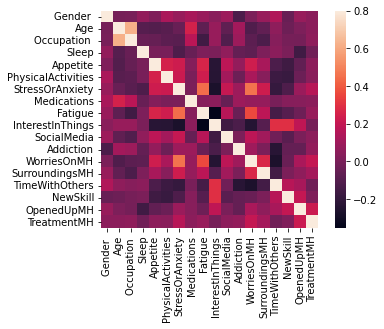

In [ ]:
corrmat = df.corr()
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

Distribution graphs

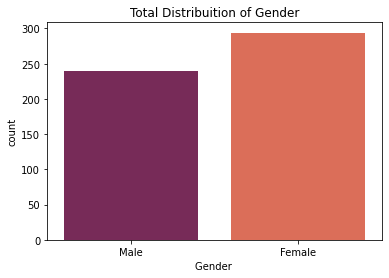

In [ ]:
labels = label_dict['Gender ']
g = sns.countplot(x="Gender ", data=df, palette="rocket")
g.set_xticklabels(labels)
plt.title('Total Distribuition of Gender')
plt.show()

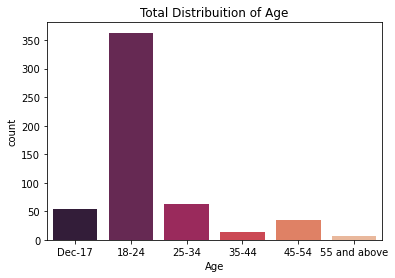

In [ ]:
labels = label_dict['Age']
g = sns.countplot(x="Age", data=df, palette="rocket")
g.set_xticklabels(labels)
plt.title('Total Distribuition of Age')
plt.show()

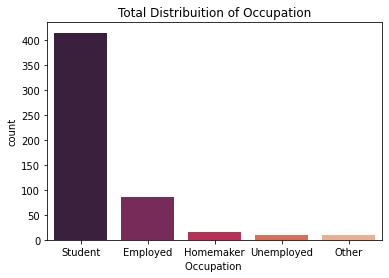

In [ ]:
labels = label_dict['Occupation ']
g = sns.countplot(x="Occupation ", data=df, palette="rocket")
g.set_xticklabels(labels)
plt.title('Total Distribuition of Occupation')
plt.show()

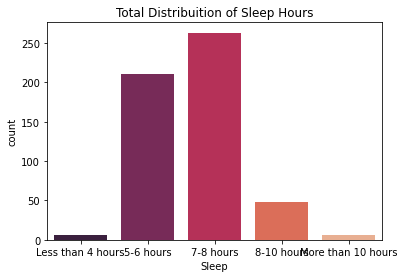

In [ ]:
labels = label_dict['Sleep']
g = sns.countplot(x="Sleep", data=df, palette="rocket")
g.set_xticklabels(labels)
plt.title('Total Distribuition of Sleep Hours')
plt.show()

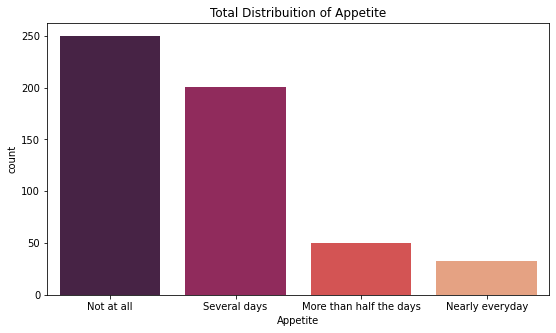

In [ ]:
plt.figure(figsize=(9,5))
labels = label_dict['Appetite']
g = sns.countplot(x="Appetite", data=df, palette="rocket")
g.set_xticklabels(labels)
plt.title('Total Distribuition of Appetite')
plt.show()

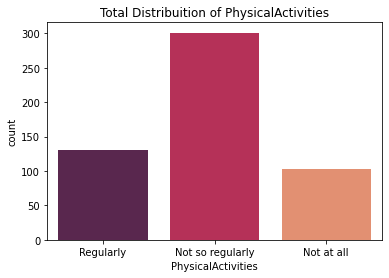

In [ ]:
labels = label_dict['PhysicalActivities']
g = sns.countplot(x="PhysicalActivities", data=df,palette="rocket")
g.set_xticklabels(labels)
plt.title('Total Distribuition of PhysicalActivities')
plt.show()

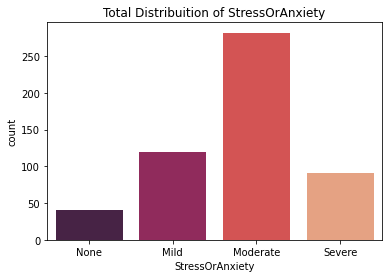

In [ ]:
labels = label_dict['StressOrAnxiety']
g = sns.countplot(x="StressOrAnxiety", data=df, palette="rocket")
g.set_xticklabels(labels)
plt.title('Total Distribuition of StressOrAnxiety')
plt.show()

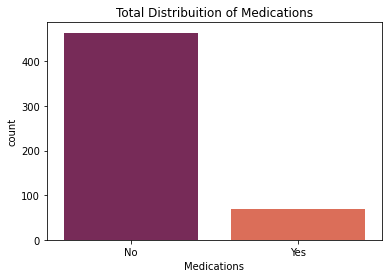

In [ ]:
labels = label_dict['Medications']
g = sns.countplot(x="Medications", data=df, palette="rocket")
g.set_xticklabels(labels)
plt.title('Total Distribuition of Medications')
plt.show()

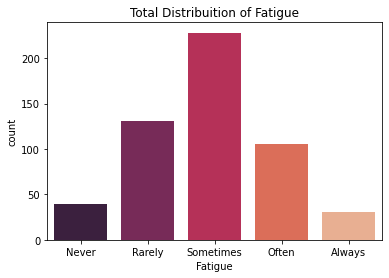

In [ ]:
labels = label_dict['Fatigue']
g = sns.countplot(x="Fatigue", data=df, palette="rocket")
g.set_xticklabels(labels)
plt.title('Total Distribuition of Fatigue')
plt.show()

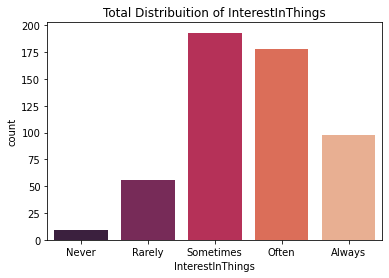

In [ ]:
labels = label_dict['InterestInThings']
g = sns.countplot(x="InterestInThings", data=df, palette="rocket")
g.set_xticklabels(labels)
plt.title('Total Distribuition of InterestInThings')
plt.show()

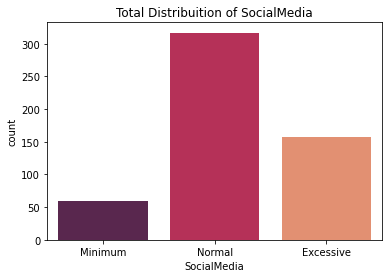

In [ ]:
labels = label_dict['SocialMedia']
g = sns.countplot(x="SocialMedia", data=df, palette="rocket")
g.set_xticklabels(labels)
plt.title('Total Distribuition of SocialMedia')
plt.show()

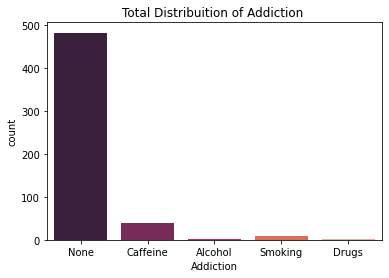

In [ ]:
labels = label_dict['Addiction']
g = sns.countplot(x="Addiction", data=df, palette="rocket")
g.set_xticklabels(labels)
plt.title('Total Distribuition of Addiction ')
plt.show()

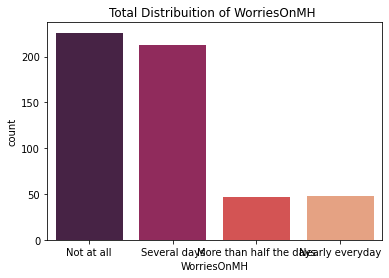

In [ ]:
labels = label_dict['WorriesOnMH']
g = sns.countplot(x="WorriesOnMH", data=df, palette="rocket")
g.set_xticklabels(labels)
plt.title('Total Distribuition of WorriesOnMH ')
plt.show()

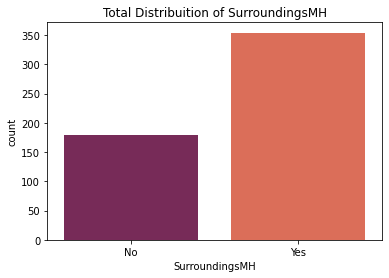

In [ ]:
labels = label_dict['SurroundingsMH']
g = sns.countplot(x="SurroundingsMH", data=df, palette="rocket")
g.set_xticklabels(labels)
plt.title('Total Distribuition of SurroundingsMH')
plt.show()

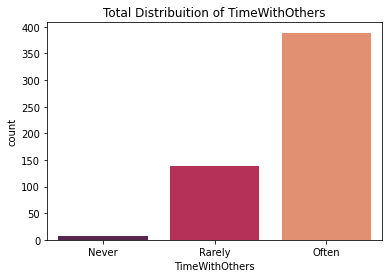

In [ ]:
labels = label_dict['TimeWithOthers']
g = sns.countplot(x="TimeWithOthers", data=df, palette="rocket")
g.set_xticklabels(labels)
plt.title('Total Distribuition of TimeWithOthers')
plt.show()

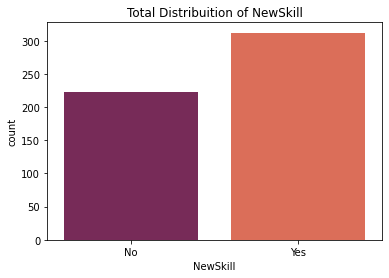

In [ ]:
labels = label_dict['NewSkill']
g = sns.countplot(x="NewSkill", data=df, palette="rocket")
g.set_xticklabels(labels)
plt.title('Total Distribuition of NewSkill')
plt.show()

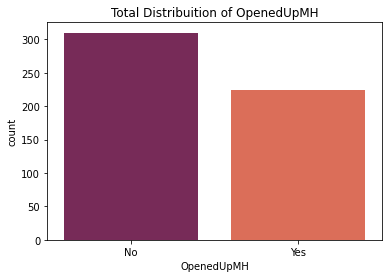

In [ ]:
labels = label_dict['OpenedUpMH']
g = sns.countplot(x="OpenedUpMH", data=df, palette="rocket")
g.set_xticklabels(labels)
plt.title('Total Distribuition of OpenedUpMH')
plt.show()

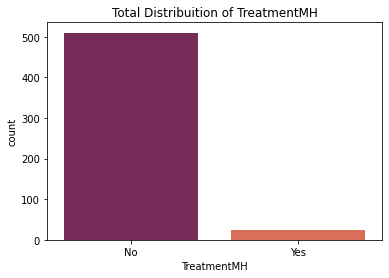

In [ ]:
labels = label_dict['TreatmentMH']
g = sns.countplot(x="TreatmentMH", data=df, palette="rocket")
g.set_xticklabels(labels)
plt.title('Total Distribuition of TreatmentMH')
plt.show()

# Algorithm Creation

Algorithm Logic

For the alorithm 7 features are selected and each options are given particular value. Values for all the 7 features are added up and according to the end sum its placed under 1 of the 3 groups made.

Table

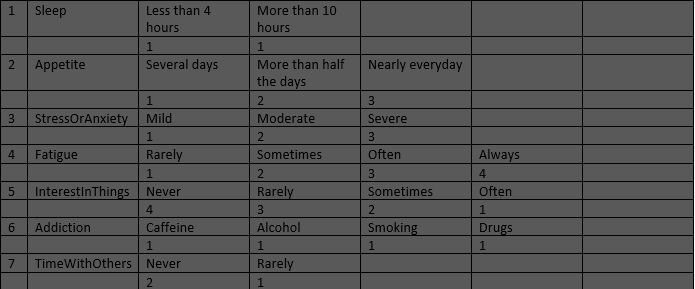

<!-- ![picture](https://drive.google.com/uc?id=1bqktqL8NwqMOBZyMuG0ebdv6jT7_AjIZ)
<img src="https://drive.google.com/uc?id=1bqktqL8NwqMOBZyMuG0ebdv6jT7_AjIZ"> -->
 


In [ ]:
group=[]
for i in df.index:
  sum=0
  val3=df.iloc[i][3]         #Sleep
  if val3==1 or val3==5:
    sum+=1
  val4=df.iloc[i][4]         #Appetite
  if val4==2:
    sum+=1
  elif val4==3:
    sum+=2
  elif val4==4:
    sum+=3
  val6=df.iloc[i][6]         #StressOrAnxiety
  if val6==2:
    sum+=1
  elif val6==3:
    sum+=2
  elif val6==4:
    sum+=3
  val8=df.iloc[i][8]         #Fatigue
  if val8==2:
    sum+=1
  elif val8==3:
    sum+=2
  elif val8==4:
    sum+=3
  elif val8==5:
    sum+=4
  val9=df.iloc[i][9]         #InterestInThings
  if val9==1:
    sum+=4
  elif val9==2:
    sum+=3
  elif val9==3:
    sum+=2
  elif val9==4:
    sum+=1
  val11=df.iloc[i][11]       #Addiction
  if val11==2 or val11==3 or val11==4 or val11==5:
    sum+=1
  val14=df.iloc[i][14]       #TimeWithOthers
  if val14==1:
    sum+=2
  elif val14==2:
    sum+=1  
  if sum in range(0,6):
    group.append(0)   
  elif sum in range(6,13):
    group.append(1)   
  elif sum in range(13,19):
    group.append(2)
     
df["CalculatedMH"]=group
df.head()

,Gender,Age,Occupation,Sleep,Appetite,PhysicalActivities,StressOrAnxiety,Medications,Fatigue,InterestInThings,SocialMedia,Addiction,WorriesOnMH,SurroundingsMH,TimeWithOthers,NewSkill,OpenedUpMH,TreatmentMH,CalculatedMH
0,2,2,1,2,2,2,3,1,2,4,3,1,2,2,3,1,2,1,0
1,2,2,1,4,1,3,2,1,5,3,2,1,3,1,2,2,1,1,1
2,1,2,1,2,2,2,4,1,4,4,2,1,2,2,3,2,1,1,1
3,2,2,1,5,3,2,4,1,4,3,3,1,3,2,3,2,2,2,1
4,2,2,1,2,3,2,4,1,4,2,3,1,3,2,3,1,1,1,1


Graphs based on CalculatedMH

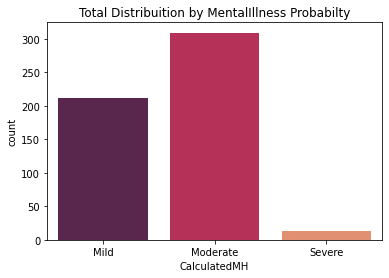

In [ ]:
labels=["Mild","Moderate","Severe"]
g = sns.countplot(x="CalculatedMH", data=df, palette="rocket")
g.set_xticklabels(labels)
plt.title('Total Distribuition by MentalIllness Probabilty')
plt.show()

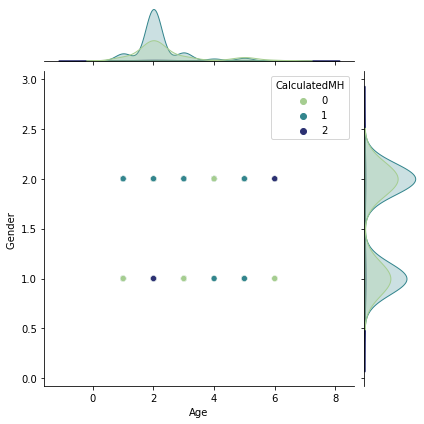

In [ ]:
sns.jointplot(x=df.iloc[:,1], y=df.iloc[:,0], kind='scatter', hue=df.iloc[:,18], palette="crest")
plt.show()

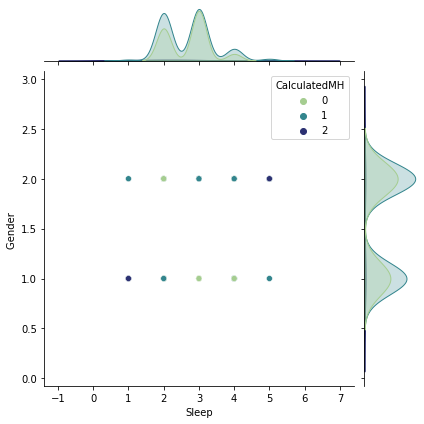

In [ ]:
g=sns.jointplot(x=df.iloc[:,3], y=df.iloc[:,0], kind='scatter', hue=df.iloc[:,18], palette="crest")
plt.show()

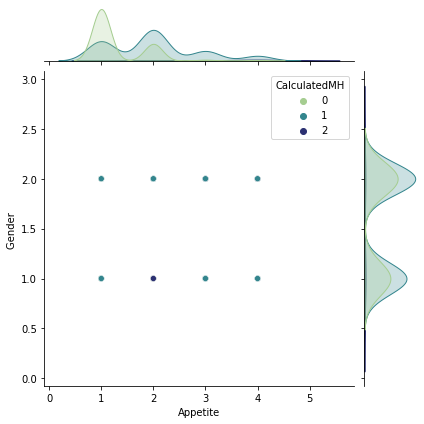

In [ ]:
g=sns.jointplot(x=df.iloc[:,4], y=df.iloc[:,0], kind='scatter', hue=df.iloc[:,18], palette="crest")
plt.show()

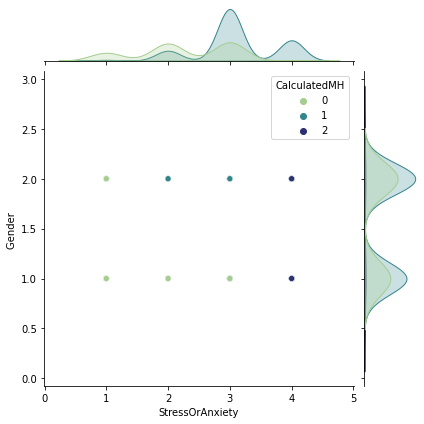

In [ ]:
g=sns.jointplot(x=df.iloc[:,6], y=df.iloc[:,0], kind='scatter', hue=df.iloc[:,18], palette="crest")
plt.show()

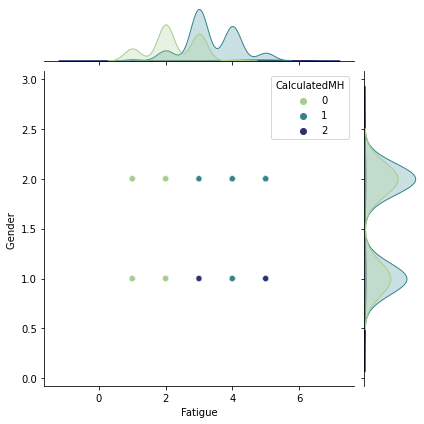

In [ ]:
g=sns.jointplot(x=df.iloc[:,8], y=df.iloc[:,0], kind='scatter', hue=df.iloc[:,18], palette="crest")
plt.show()

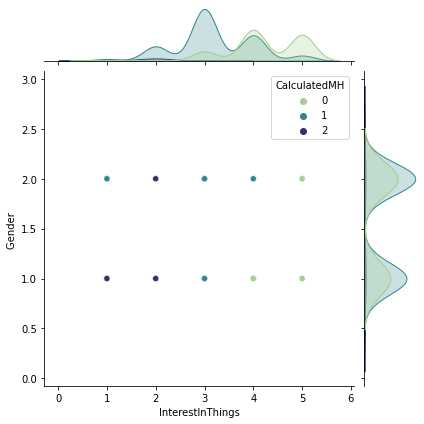

In [ ]:
g=sns.jointplot(x=df.iloc[:,9], y=df.iloc[:,0], kind='scatter', hue=df.iloc[:,18], palette="crest")
plt.show()

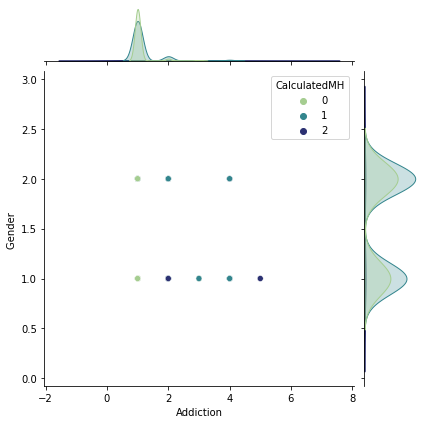

In [ ]:
g=sns.jointplot(x=df.iloc[:,11], y=df.iloc[:,0], kind='scatter', hue=df.iloc[:,18], palette="crest")
plt.show()

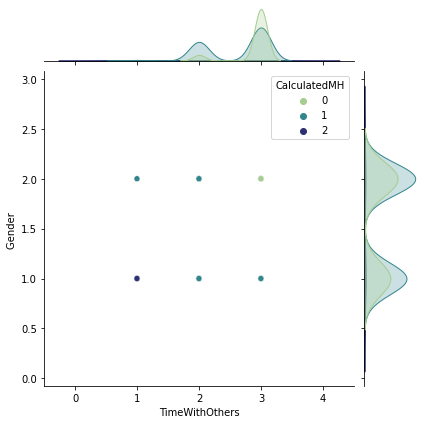

In [ ]:
g=sns.jointplot(x=df.iloc[:,14], y=df.iloc[:,0], kind='scatter', hue=df.iloc[:,18], palette="crest")
plt.show()

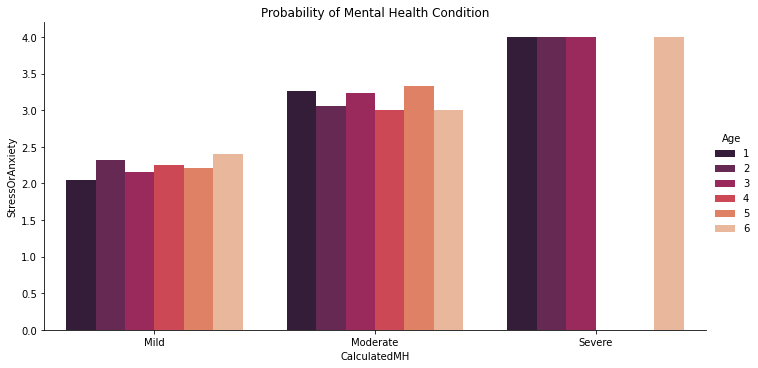

In [ ]:
labels=["Mild","Moderate","Severe"]
g = sns.catplot(x="CalculatedMH", y="StressOrAnxiety", hue="Age", data=df, kind="bar",
                ci=None, height=5, aspect=2, legend_out = True, palette="rocket")
g.set_xticklabels(labels)
plt.title('Probability of Mental Health Condition')
plt.ylabel('StressOrAnxiety')
plt.xlabel('CalculatedMH')
plt.show()

# Data Splitting

In [ ]:
# define X and y
X = df.iloc[:,[3,4,6,8,9,11,14]]
y = df.CalculatedMH
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(427, 7)
(107, 7)
(427,)
(107,)


# Cross Validation

K-Fold cross validation


In [ ]:
knn_class=KNeighborsClassifier()
kf=KFold(n_splits=5)
score=cross_val_score(knn_class,X_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score: {}".format(score.mean()))

Cross Validation Scores are [0.88372093 0.93023256 0.91764706 0.89411765 0.94117647]
Average Cross Validation score: 0.9133789329685362


In [ ]:
dtree_class=DecisionTreeClassifier()
kf=KFold(n_splits=5)
score=cross_val_score(dtree_class,X_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score: {}".format(score.mean()))

Cross Validation Scores are [0.91860465 0.90697674 0.89411765 0.90588235 0.94117647]
Average Cross Validation score: 0.9133515731874144


In [ ]:
nb_class=GaussianNB()
kf=KFold(n_splits=5)
score=cross_val_score(nb_class,X_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score: {}".format(score.mean()))

Cross Validation Scores are [0.8372093  0.84883721 0.83529412 0.78823529 0.77647059]
Average Cross Validation score: 0.8172093023255813


In [ ]:
rf_class=RandomForestClassifier()
kf=KFold(n_splits=5)
score=cross_val_score(rf_class, X_train, y_train, cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score: {}".format(score.mean()))

Cross Validation Scores are [0.91860465 0.93023256 0.91764706 0.89411765 0.97647059]
Average Cross Validation score: 0.9274145006839944


In [ ]:
gb_class=GradientBoostingClassifier()
kf=KFold(n_splits=5)
score=cross_val_score(gb_class,X_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score: {}".format(score.mean()))

Cross Validation Scores are [0.95348837 0.93023256 0.95294118 0.95294118 0.98823529]
Average Cross Validation score: 0.9555677154582763


# K-Nearest Neighbours

In [ ]:
 
k_range=range(1,21)
scores_list=[]
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  scores_list.append(metrics.accuracy_score(y_test, y_pred))

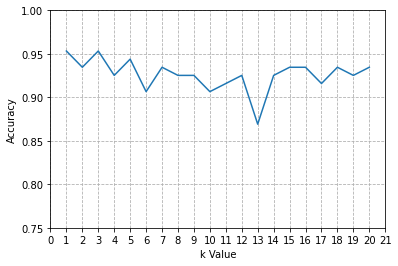

In [ ]:
fig, ax =plt.subplots()
ax.set_xlim(0,21)
ax.set_ylim(.75,1)
plt.plot(k_range,scores_list)
plt.xlabel("k Value")
plt.ylabel("Accuracy")
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(0.05))
plt.grid(which="major",linestyle="--")
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
#print(knn_pred)
print(metrics.accuracy_score(y_test, knn_pred))

0.9532710280373832


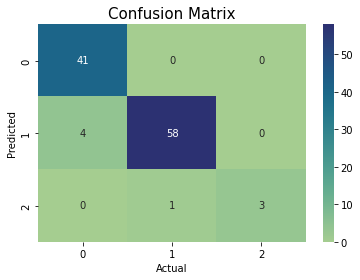

In [ ]:
cf_matrix = confusion_matrix(y_test, knn_pred)
sns.heatmap(cf_matrix, annot=True, cmap="crest")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix", fontsize=15)
plt.show()

# Decision Tree

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
#print(dtree_pred)
print(metrics.accuracy_score(y_test, dtree_pred))

0.9626168224299065


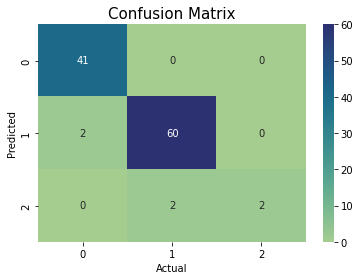

In [ ]:
cf_matrix = confusion_matrix(y_test, dtree_pred)
sns.heatmap(cf_matrix, annot=True, cmap="crest")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix", fontsize=15)
plt.show()

# Naive Bayes

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
#print(nb_pred)
print(metrics.accuracy_score(y_test, nb_pred))

0.8504672897196262


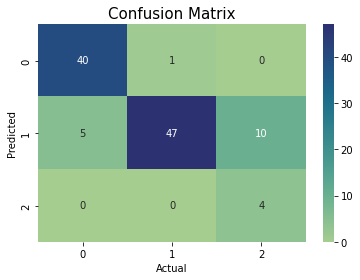

In [ ]:
cf_matrix = confusion_matrix(y_test, nb_pred)
sns.heatmap(cf_matrix, annot=True, cmap="crest")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix", fontsize=15)
plt.show()

# Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
#print(rf_pred)
print(metrics.accuracy_score(y_test, rf_pred))

0.9439252336448598


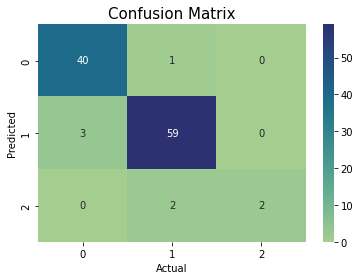

In [ ]:
cf_matrix = confusion_matrix(y_test, rf_pred)
sns.heatmap(cf_matrix, annot=True, cmap="crest")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix", fontsize=15)
plt.show()

# Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_pred = gb.predict(X_test)
#print(gb_pred)
print(metrics.accuracy_score(y_test, gb_pred))

0.9626168224299065


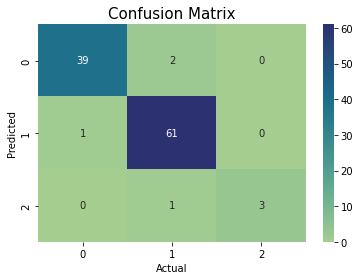

In [ ]:
cf_matrix = confusion_matrix(y_test, gb_pred)
sns.heatmap(cf_matrix, annot=True, cmap="crest")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix", fontsize=15)
plt.show()

# Observation

k Nearest Neighbour - 95.32710280373831
Decision Tree - 96.26168224299066
Naive Bayes - 85.04672897196261
Random Forest - 94.39252336448598
Gradient Boosting - 96.26168224299066


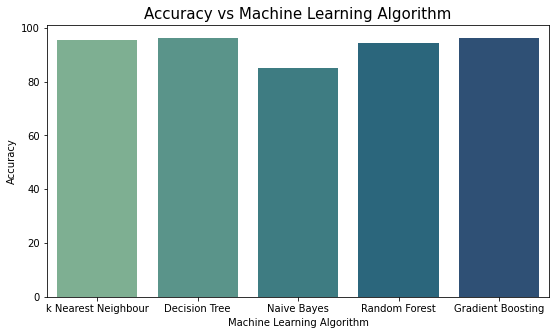

In [ ]:
Acc_list=[]
Acc_list.append(100*metrics.accuracy_score(y_test, knn_pred))
Acc_list.append(100*metrics.accuracy_score(y_test, dtree_pred))
Acc_list.append(100*metrics.accuracy_score(y_test, nb_pred))
Acc_list.append(100*metrics.accuracy_score(y_test, rf_pred))
Acc_list.append(100*metrics.accuracy_score(y_test, gb_pred))
Algo_list=["k Nearest Neighbour","Decision Tree","Naive Bayes","Random Forest","Gradient Boosting"]
for i in range(5):
  print(Algo_list[i],'-',Acc_list[i])
plt.figure(figsize=(9,5))
ax = sns.barplot(x=Algo_list, y=Acc_list, palette="crest")
plt.xlabel("Machine Learning Algorithm")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Machine Learning Algorithm", fontsize=15)
plt.show()
 